In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import seaborn as sns
import numpy as np
from pandas_profiling import ProfileReport

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/proyecto/Sudden_Cardiac_Death_Holter_Database.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.



,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,30.0,N,2.0,194.0,0.003261,0.159554,-0.046726,-0.046726,-0.129022,4.0,...,-0.131451,29.0,17.0,95.0,49.0,-0.131451,-0.015809,0.109493,-0.153622,-0.200331
1,30.0,N,194.0,188.0,-0.058462,0.067970,0.285091,-0.272093,-0.062109,25.0,...,-0.048727,25.0,2.0,76.0,49.0,-0.048727,0.034657,0.282264,-0.013981,-0.226871
2,30.0,N,188.0,194.0,-0.012959,-0.089749,0.329466,-0.204659,-0.012971,29.0,...,-0.005256,29.0,5.0,53.0,19.0,-0.005256,0.007639,0.116198,0.271552,-0.114414
3,30.0,N,194.0,198.0,-0.032815,-0.113236,0.398437,-0.178191,-0.068497,36.0,...,-0.069992,35.0,26.0,76.0,15.0,-0.069992,-0.049489,0.030777,0.378075,-0.074389
4,30.0,N,198.0,196.0,-0.047353,0.164835,0.364677,-0.207953,-0.061457,39.0,...,-0.072007,35.0,25.0,115.0,55.0,-0.072007,-0.053251,0.044583,0.313201,-0.157637


## **CLEANING THE DATASET**

In [ ]:
df['type'].value_counts()

N       403528
VEB      14723
Q         6520
SVEB      1609
F          211
Name: type, dtype: int64

Quitamos los latidos Q, SVEB, F porque no son ventriculares y no estan relacionados con la taquicardia ventricular. No se asignan a latidos N o VEB porque no comparten la misma morfología, por lo que supondría meter ruido al algoritmo. 

In [ ]:
df = df[(df['type']=='N') | (df['type']=='VEB')]
df.head()

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,30.0,N,2.0,194.0,0.003261,0.159554,-0.046726,-0.046726,-0.129022,4.0,...,-0.131451,29.0,17.0,95.0,49.0,-0.131451,-0.015809,0.109493,-0.153622,-0.200331
1,30.0,N,194.0,188.0,-0.058462,0.067970,0.285091,-0.272093,-0.062109,25.0,...,-0.048727,25.0,2.0,76.0,49.0,-0.048727,0.034657,0.282264,-0.013981,-0.226871
2,30.0,N,188.0,194.0,-0.012959,-0.089749,0.329466,-0.204659,-0.012971,29.0,...,-0.005256,29.0,5.0,53.0,19.0,-0.005256,0.007639,0.116198,0.271552,-0.114414
3,30.0,N,194.0,198.0,-0.032815,-0.113236,0.398437,-0.178191,-0.068497,36.0,...,-0.069992,35.0,26.0,76.0,15.0,-0.069992,-0.049489,0.030777,0.378075,-0.074389
4,30.0,N,198.0,196.0,-0.047353,0.164835,0.364677,-0.207953,-0.061457,39.0,...,-0.072007,35.0,25.0,115.0,55.0,-0.072007,-0.053251,0.044583,0.313201,-0.157637


In [ ]:
df['type'].value_counts()

N      403528
VEB     14723
Name: type, dtype: int64

En el set de datos contamos con información de dos derivaciones, es decir, de dos señales cardíacas. Como esta información es redundante, se pueden eliminar las variables asociadas a una de ellas. 

In [ ]:
# quitamos la señal de la derivacion 5
columnsV2 = []
for column in df.columns:
  if column.startswith('0') or column == 'type':
    columnsV2.append(column)

df = df[columnsV2]
df.head()

,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,0_qt_interval,0_st_interval,0_qrs_morph0,0_qrs_morph1,0_qrs_morph2,0_qrs_morph3,0_qrs_morph4
0,N,2.0,194.0,0.003261,0.159554,-0.046726,-0.046726,-0.129022,4.0,17.0,26.0,5.0,-0.129022,-0.129022,-0.124214,-0.110162,-0.084562
1,N,194.0,188.0,-0.058462,0.067970,0.285091,-0.272093,-0.062109,25.0,3.0,76.0,48.0,-0.062109,0.036850,0.285091,-0.043150,-0.245206
2,N,188.0,194.0,-0.012959,-0.089749,0.329466,-0.204659,-0.012971,29.0,1.0,52.0,22.0,-0.012971,0.004394,0.094254,0.326649,-0.062910
3,N,194.0,198.0,-0.032815,-0.113236,0.398437,-0.178191,-0.068497,36.0,9.0,61.0,16.0,-0.068497,-0.034999,0.029116,0.398437,-0.050141
4,N,198.0,196.0,-0.047353,0.164835,0.364677,-0.207953,-0.061457,39.0,6.0,99.0,54.0,-0.061457,-0.054563,-0.007961,0.364677,-0.131422


In [ ]:
# change column name
df.columns = ['target', 'pre-RR', 'post-RR', 'pPeak', 'tPeak', 'rPeak',
              'sPeak', 'qPeak', 'qrs_interval', 'pq_interval',
              'qt_interval', 'st_interval', 'qrs_morph0', 'qrs_morph1',
              'qrs_morph2', 'qrs_morph3', 'qrs_morph4']

In [ ]:
# Missing value rate of columns
df.isnull().mean()*100

target          0.0
pre-RR          0.0
post-RR         0.0
pPeak           0.0
tPeak           0.0
rPeak           0.0
sPeak           0.0
qPeak           0.0
qrs_interval    0.0
pq_interval     0.0
qt_interval     0.0
st_interval     0.0
qrs_morph0      0.0
qrs_morph1      0.0
qrs_morph2      0.0
qrs_morph3      0.0
qrs_morph4      0.0
dtype: float64

In [ ]:
# nulls in rows
np.unique(df.isnull().mean(axis=1)*100)

array([0.])

In [ ]:
# eliminación de outliers en los tiempos RR
q_99 = df['pre-RR'].quantile(0.99)
is_outlier = df['pre-RR'] > q_99
df = df.drop(df[is_outlier].index)

q_99 = df['post-RR'].quantile(0.99)
is_outlier = df['post-RR'] > q_99
df = df.drop(df[is_outlier].index)

In [ ]:
# la N es 0 y los VEB son 1
def change_letter_by_numer(x):
  if x == 'N':
    return 0
  else:
    return 1

df['target'] = df.target.apply(change_letter_by_numer)
target = df['target']

## **FEATURE ANALYSIS**

In [ ]:
df.dtypes

target            int64
pre-RR          float64
post-RR         float64
pPeak           float64
tPeak           float64
rPeak           float64
sPeak           float64
qPeak           float64
qrs_interval    float64
pq_interval     float64
qt_interval     float64
st_interval     float64
qrs_morph0      float64
qrs_morph1      float64
qrs_morph2      float64
qrs_morph3      float64
qrs_morph4      float64
dtype: object

In [ ]:
df.describe()

,target,pre-RR,post-RR,pPeak,tPeak,rPeak,sPeak,qPeak,qrs_interval,pq_interval,qt_interval,st_interval,qrs_morph0,qrs_morph1,qrs_morph2,qrs_morph3,qrs_morph4
count,418251.000000,418251.000000,418251.000000,418251.000000,418251.000000,418251.000000,418251.000000,418251.000000,418251.000000,418251.000000,418251.000000,418251.000000,418251.000000,418251.000000,418251.000000,418251.000000,418251.000000
mean,0.035201,229.704814,230.006967,0.054887,0.570266,0.263544,-0.161565,-0.071926,19.054506,11.900894,54.373697,23.418297,-0.071926,-0.050203,0.005100,0.116453,0.123566
std,0.184289,52.848195,54.990266,0.130024,0.561347,0.405171,0.369921,0.108377,13.894269,9.048211,37.084817,25.002556,0.108377,0.119927,0.199462,0.299470,0.318521
min,0.000000,2.000000,14.000000,-1.601843,-1.640672,-2.224594,-3.106228,-2.931771,0.000000,1.000000,3.000000,1.000000,-2.931771,-2.541325,-2.641653,-2.935121,-3.084921
25%,0.000000,192.000000,192.000000,-0.007302,0.143817,-0.034804,-0.490063,-0.105546,6.000000,5.000000,28.000000,8.000000,-0.105546,-0.091887,-0.076347,-0.064882,-0.058849
50%,0.000000,226.000000,226.000000,0.030860,0.364082,0.060022,-0.062738,-0.060589,19.000000,10.000000,44.000000,13.000000,-0.060589,-0.048440,-0.030068,-0.011490,-0.016397
75%,0.000000,270.000000,270.000000,0.086620,1.088575,0.635687,-0.013991,-0.029038,30.000000,16.000000,63.000000,21.000000,-0.029038,-0.010627,0.037289,0.308723,0.300467
max,1.000000,1944.000000,10964.000000,3.341772,2.759539,2.434247,2.193149,2.050436,232.000000,128.000000,274.000000,137.000000,2.050436,2.050436,2.305579,2.337161,2.419167


In [ ]:
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip  


In [ ]:
#from pandas_profiling import ProfileReport
#ProfileReport(df)

count    418251.000000
mean        229.704814
std          52.848195
min           2.000000
25%         192.000000
50%         226.000000
75%         270.000000
max        1944.000000
Name: pre-RR, dtype: float64

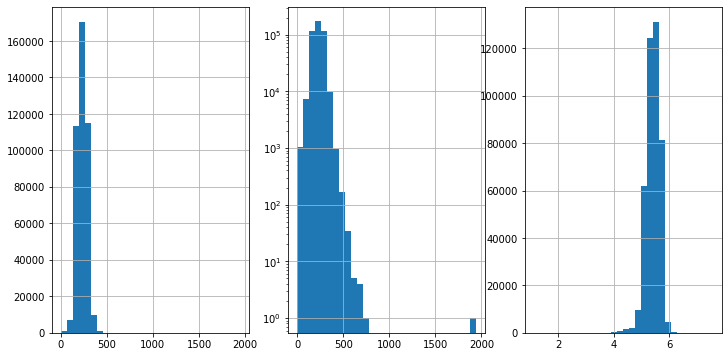

count    418251.000000
mean        230.006967
std          54.990266
min          14.000000
25%         192.000000
50%         226.000000
75%         270.000000
max       10964.000000
Name: post-RR, dtype: float64

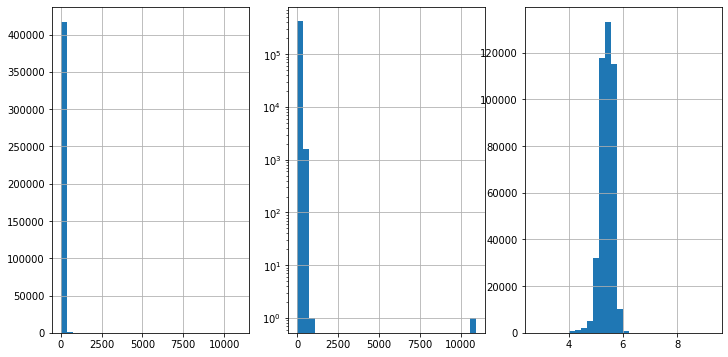

count    418251.000000
mean          0.054887
std           0.130024
min          -1.601843
25%          -0.007302
50%           0.030860
75%           0.086620
max           3.341772
Name: pPeak, dtype: float64

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


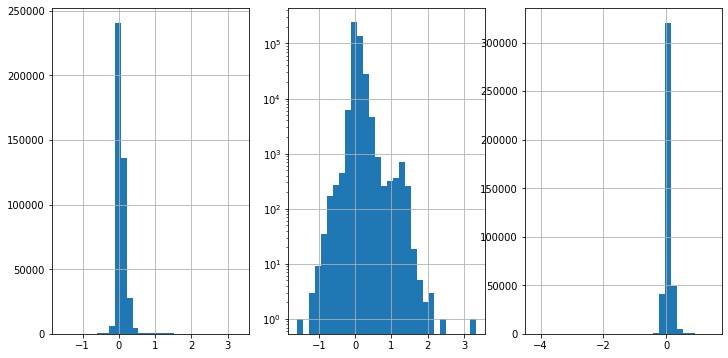

count    418251.000000
mean          0.570266
std           0.561347
min          -1.640672
25%           0.143817
50%           0.364082
75%           1.088575
max           2.759539
Name: tPeak, dtype: float64

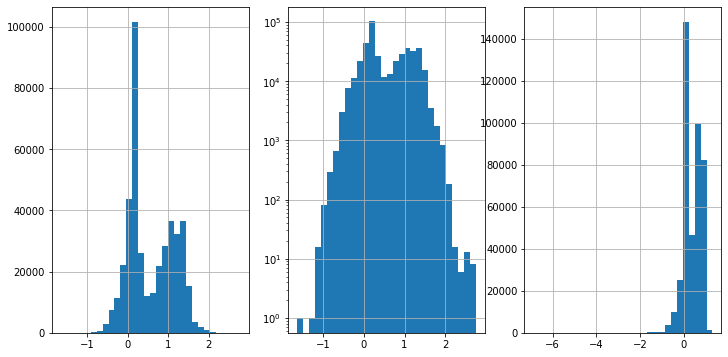

count    418251.000000
mean          0.263544
std           0.405171
min          -2.224594
25%          -0.034804
50%           0.060022
75%           0.635687
max           2.434247
Name: rPeak, dtype: float64

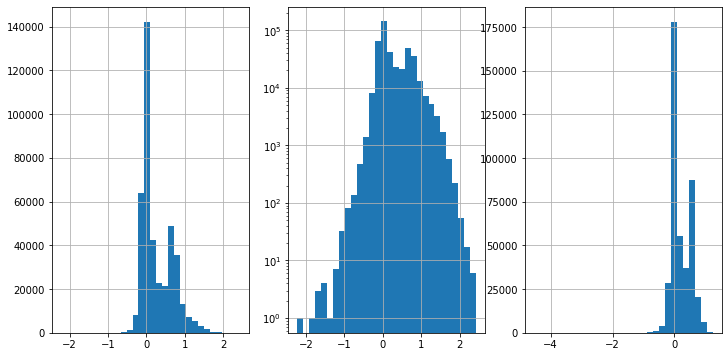

count    418251.000000
mean         -0.161565
std           0.369921
min          -3.106228
25%          -0.490063
50%          -0.062738
75%          -0.013991
max           2.193149
Name: sPeak, dtype: float64

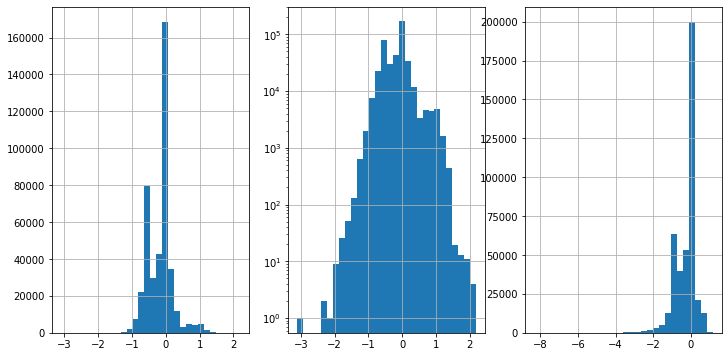

count    418251.000000
mean         -0.071926
std           0.108377
min          -2.931771
25%          -0.105546
50%          -0.060589
75%          -0.029038
max           2.050436
Name: qPeak, dtype: float64

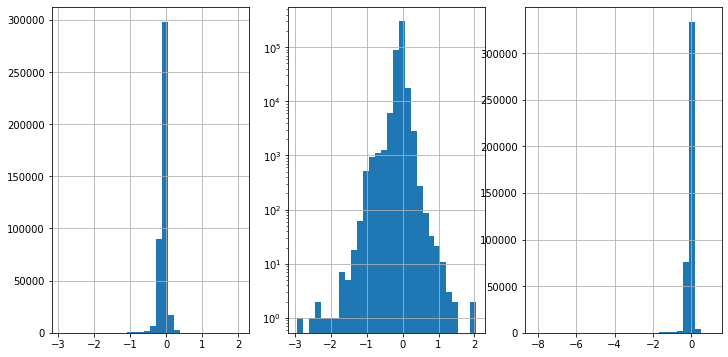

count    418251.000000
mean         19.054506
std          13.894269
min           0.000000
25%           6.000000
50%          19.000000
75%          30.000000
max         232.000000
Name: qrs_interval, dtype: float64

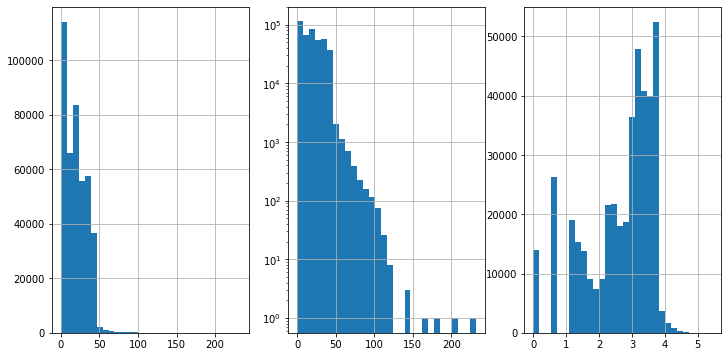

count    418251.000000
mean         11.900894
std           9.048211
min           1.000000
25%           5.000000
50%          10.000000
75%          16.000000
max         128.000000
Name: pq_interval, dtype: float64

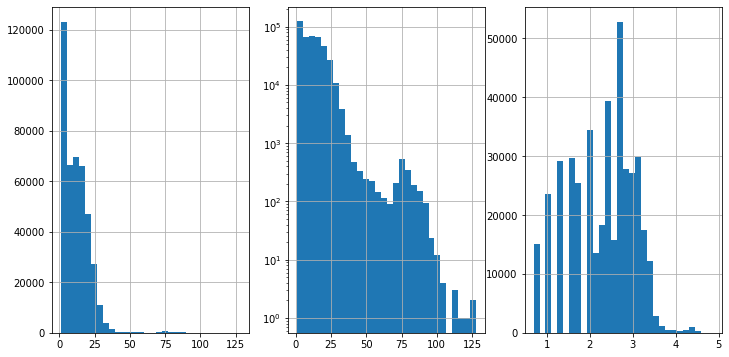

count    418251.000000
mean         54.373697
std          37.084817
min           3.000000
25%          28.000000
50%          44.000000
75%          63.000000
max         274.000000
Name: qt_interval, dtype: float64

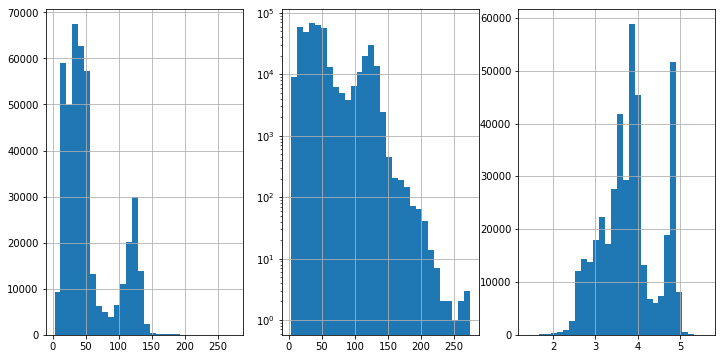

count    418251.000000
mean         23.418297
std          25.002556
min           1.000000
25%           8.000000
50%          13.000000
75%          21.000000
max         137.000000
Name: st_interval, dtype: float64

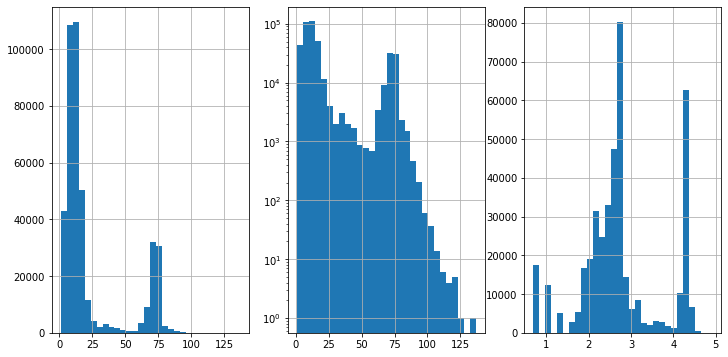

count    418251.000000
mean         -0.071926
std           0.108377
min          -2.931771
25%          -0.105546
50%          -0.060589
75%          -0.029038
max           2.050436
Name: qrs_morph0, dtype: float64

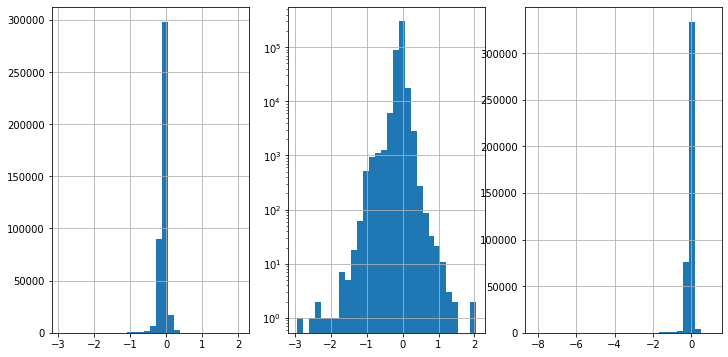

count    418251.000000
mean         -0.050203
std           0.119927
min          -2.541325
25%          -0.091887
50%          -0.048440
75%          -0.010627
max           2.050436
Name: qrs_morph1, dtype: float64

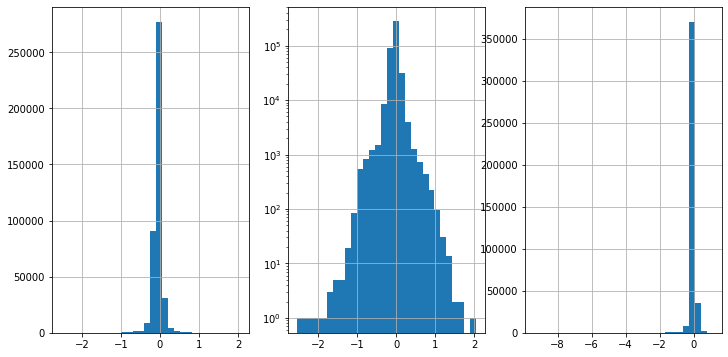

count    418251.000000
mean          0.005100
std           0.199462
min          -2.641653
25%          -0.076347
50%          -0.030068
75%           0.037289
max           2.305579
Name: qrs_morph2, dtype: float64

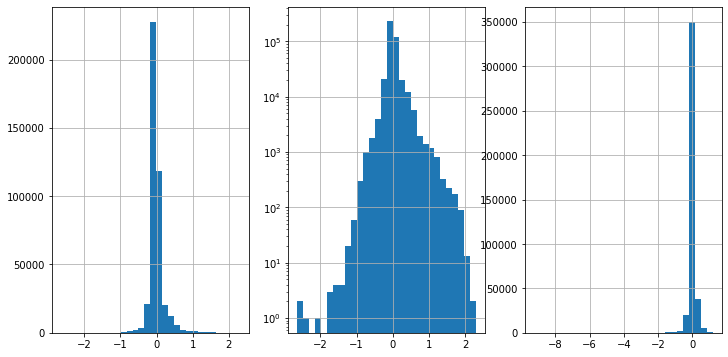

count    418251.000000
mean          0.116453
std           0.299470
min          -2.935121
25%          -0.064882
50%          -0.011490
75%           0.308723
max           2.337161
Name: qrs_morph3, dtype: float64

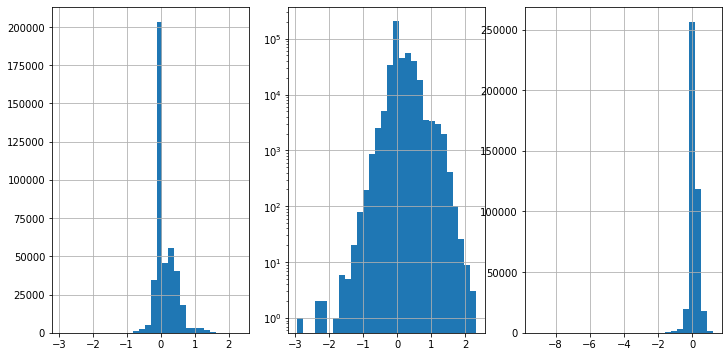

count    418251.000000
mean          0.123566
std           0.318521
min          -3.084921
25%          -0.058849
50%          -0.016397
75%           0.300467
max           2.419167
Name: qrs_morph4, dtype: float64

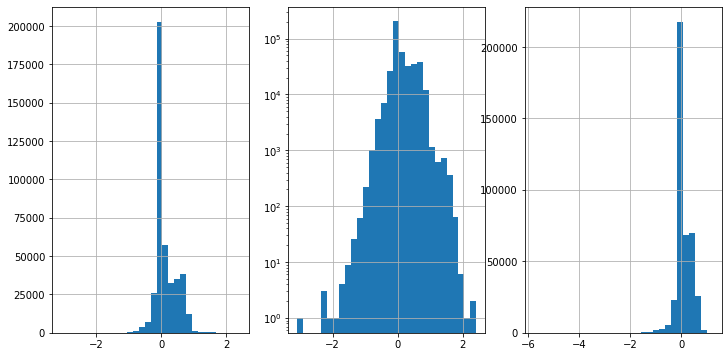

In [ ]:
%matplotlib inline
num_vars = df.columns[1:len(df.columns)]
for var in num_vars[0:len(num_vars)]:
  display(df[var].describe())
  fig, ax = plt.subplots(1,3,figsize=(12,6))
  df[var].hist(bins=30, ax=ax[0])
  df[var].hist(bins=30, log=True, ax=ax[1])
  np.log(df[var]+1).hist(bins=30,ax=ax[2])
  plt.show()

Las variables "st_interval", "qt_interval", "pq_interval" y "qrs_interval" no presentan una distribución normal, por lo que han de normalizarse. Para ello se prueban el logaritmo de la variable y las trasformaciones Box-Cox y Yeo-Johnson. 

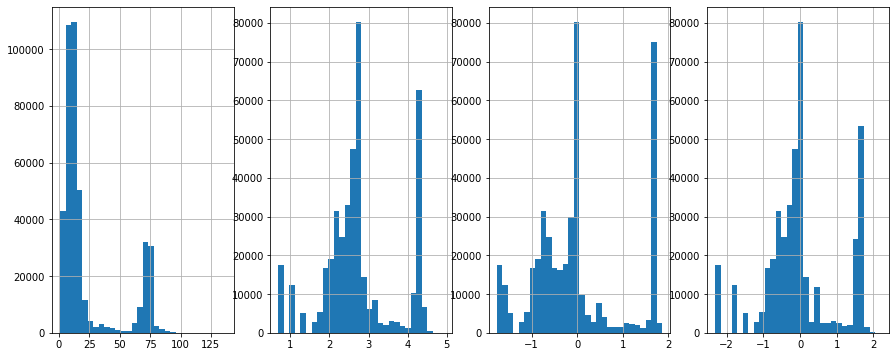

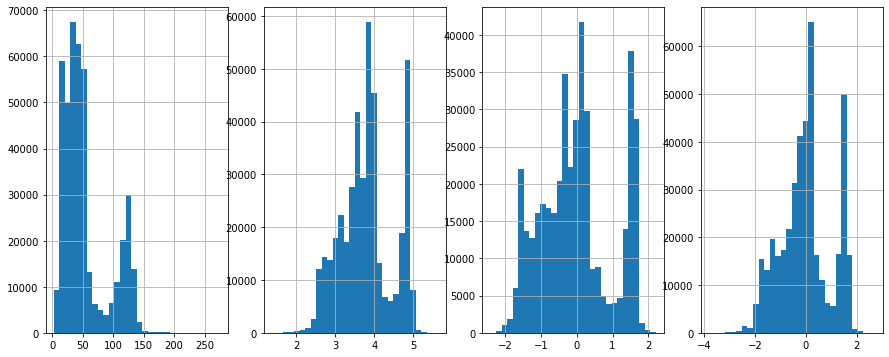

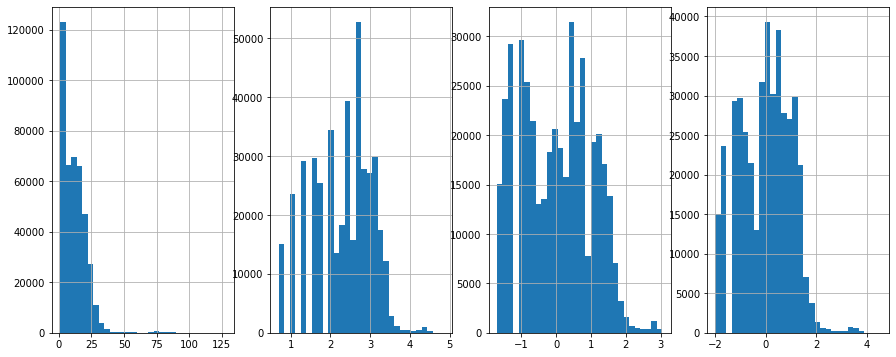

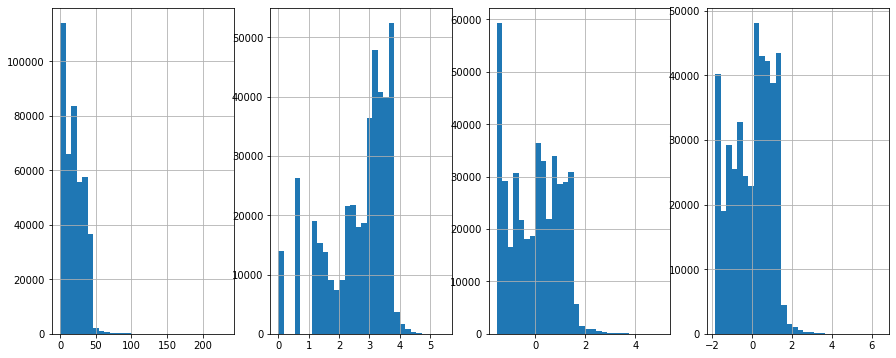

In [ ]:
from sklearn.preprocessing import MinMaxScaler,PowerTransformer
from sklearn.pipeline import Pipeline

vars_to_norm = ['st_interval', 'qt_interval', 'pq_interval', 'qrs_interval']

# box-cox trasformation
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])
bc_cols = pipeline.fit_transform(df[vars_to_norm])
bc_df = pd.DataFrame(bc_cols, columns=vars_to_norm)

# yeo trasformation
pt = PowerTransformer(method='yeo-johnson')
yeo_df = pd.DataFrame(pt.fit_transform(df[vars_to_norm]), 
                      columns=vars_to_norm)

for var in vars_to_norm:
  fig, ax = plt.subplots(1,4,figsize=(15,6))
  df[var].hist(bins=30, ax=ax[0])
  np.log(df[var]+1).hist(bins=30,ax=ax[1])
  bc_df[var].hist(bins=30, ax=ax[2])
  yeo_df[var].hist(bins=30, ax=ax[3])

Decidimos escoger una trasformación logarítmica de las variables para normalizarlas. 

In [ ]:
log_df = df.copy()
log_df['log_st_interval'] = np.log(df['st_interval']+1)
log_df['log_qt_interval'] = np.log(df['qt_interval']+1)
log_df['log_pq_interval'] = np.log(df['pq_interval']+1)
log_df['log_qrs_interval'] = np.log(df['qrs_interval']+1)
log_df = log_df.drop(columns=['qrs_interval', 'pq_interval', 'qt_interval', 'st_interval'])
log_df.head()

,target,pre-RR,post-RR,pPeak,tPeak,rPeak,sPeak,qPeak,qrs_morph0,qrs_morph1,qrs_morph2,qrs_morph3,qrs_morph4,log_st_interval,log_qt_interval,log_pq_interval,log_qrs_interval
0,0,2.0,194.0,0.003261,0.159554,-0.046726,-0.046726,-0.129022,-0.129022,-0.129022,-0.124214,-0.110162,-0.084562,1.791759,3.295837,2.890372,1.609438
1,0,194.0,188.0,-0.058462,0.067970,0.285091,-0.272093,-0.062109,-0.062109,0.036850,0.285091,-0.043150,-0.245206,3.891820,4.343805,1.386294,3.258097
2,0,188.0,194.0,-0.012959,-0.089749,0.329466,-0.204659,-0.012971,-0.012971,0.004394,0.094254,0.326649,-0.062910,3.135494,3.970292,0.693147,3.401197
3,0,194.0,198.0,-0.032815,-0.113236,0.398437,-0.178191,-0.068497,-0.068497,-0.034999,0.029116,0.398437,-0.050141,2.833213,4.127134,2.302585,3.610918
4,0,198.0,196.0,-0.047353,0.164835,0.364677,-0.207953,-0.061457,-0.061457,-0.054563,-0.007961,0.364677,-0.131422,4.007333,4.605170,1.945910,3.688879


Estudiamos la correlación de las variables con la correlación de Pearson. 

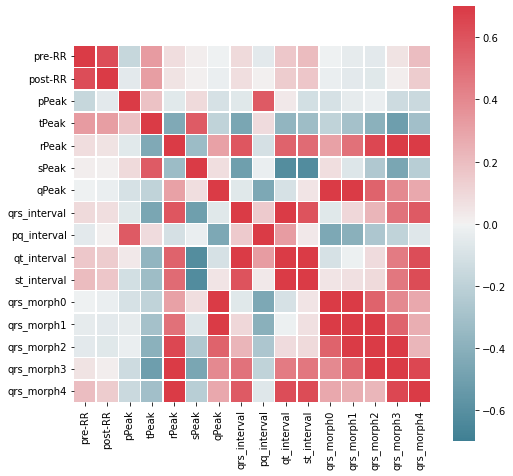

In [ ]:
corr = df[num_vars].corr(method='pearson') # Pearson (linear), Spearman (non linear)

f, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)


sns.heatmap(corr, cmap=cmap, vmin=-0.7, vmax=0.7,
            square=True, linewidths=.5)

# alta correlación entre: pre y post RR, morfologías del qrs consecutivas (el qrs_0,
# con el qrs_1, el 1 con el 2...), peaks de las ondas q, r, s con las morph_qrs,
# peaks  con los intervalos entre las ondas. 

In [ ]:
# CORRELACION ENTRE LAS MORFOLOGÍAS 
sns.pairplot(df[['qrs_morph0',	'qrs_morph1',	'qrs_morph2',	'qrs_morph3',	'qrs_morph4', 'target']], hue='target')

Implementamos un test Anova.

In [ ]:
from scipy import stats
def anova_test(df, vars_:list, target_:str, plot_:bool=True):
    """
    Performs one-way ANOVA test between numerical variables in vars_ and categorical feature in target_
    The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. 
    The test is applied to samples from two or more groups, possibly with differing sizes.
    :param df: Dataframe with features and target
    :param vars_: list of features to try
    :param plot_: True if we want to plot target as a function of feature
    returns None
    """

    fig, ax = plt.subplots(4,4,figsize=(15,15))
    ax = ax.flatten()
    k = 0
    for var in vars_:
      print(var)
      args = [df[df[target_]==i].dropna()[var] for i in df[target_].unique()]
      print(stats.f_oneway(*args))
      sns.boxplot(x = target_, y = var, data = df, fliersize=0, ax=ax[k])
      k += 1
    plt.xticks(rotation=70)
    fig.tight_layout()
    plt.show()

pre-RR
F_onewayResult(statistic=42547.02162349494, pvalue=0.0)
post-RR
F_onewayResult(statistic=262.3449943572842, pvalue=5.512730718792196e-59)
pPeak
F_onewayResult(statistic=9384.871041407103, pvalue=0.0)
tPeak
F_onewayResult(statistic=4350.275603672948, pvalue=0.0)
rPeak
F_onewayResult(statistic=347.2170388242451, pvalue=1.8392233352544598e-77)
sPeak
F_onewayResult(statistic=5858.3107434299545, pvalue=0.0)
qPeak
F_onewayResult(statistic=7825.507759149472, pvalue=0.0)
qrs_interval
F_onewayResult(statistic=585.2313607958276, pvalue=3.351901864954407e-129)
pq_interval
F_onewayResult(statistic=7091.530698821792, pvalue=0.0)
qt_interval
F_onewayResult(statistic=1074.9194092617815, pvalue=1.8623184651548825e-235)
st_interval
F_onewayResult(statistic=24.13625314047367, pvalue=8.978839306599621e-07)
qrs_morph0
F_onewayResult(statistic=7825.507759149472, pvalue=0.0)
qrs_morph1
F_onewayResult(statistic=4853.044361016296, pvalue=0.0)
qrs_morph2
F_onewayResult(statistic=1225.5559483596462, pval

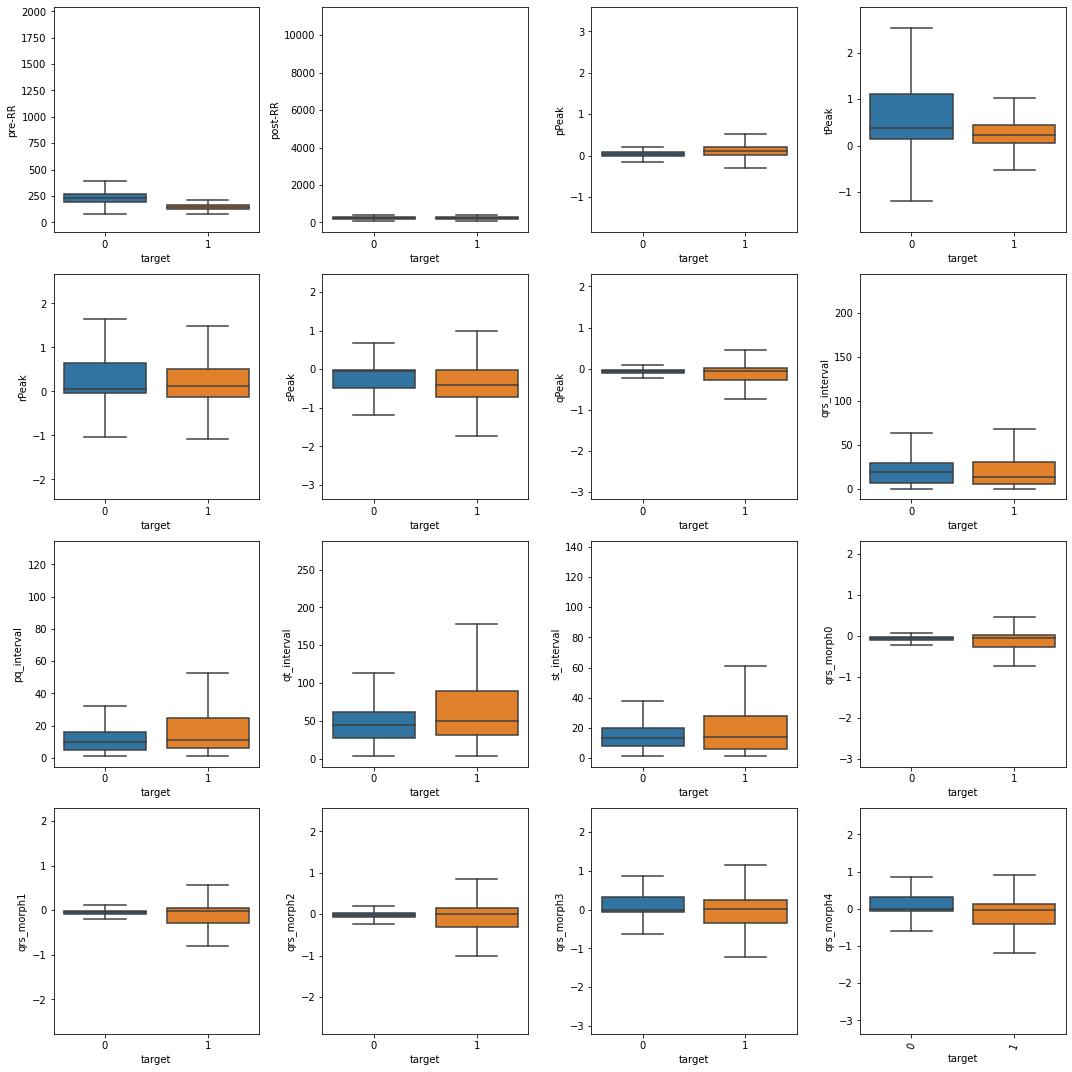

In [ ]:
anova_test(df, vars_=num_vars, target_ = 'target', plot_=True)

## **FEATURE SELECTION**

In [ ]:
X = log_df.drop(columns='target')
y = log_df['target']

X.head()

,pre-RR,post-RR,pPeak,tPeak,rPeak,sPeak,qPeak,qrs_morph0,qrs_morph1,qrs_morph2,qrs_morph3,qrs_morph4,log_st_interval,log_qt_interval,log_pq_interval,log_qrs_interval
0,2.0,194.0,0.003261,0.159554,-0.046726,-0.046726,-0.129022,-0.129022,-0.129022,-0.124214,-0.110162,-0.084562,1.791759,3.295837,2.890372,1.609438
1,194.0,188.0,-0.058462,0.067970,0.285091,-0.272093,-0.062109,-0.062109,0.036850,0.285091,-0.043150,-0.245206,3.891820,4.343805,1.386294,3.258097
2,188.0,194.0,-0.012959,-0.089749,0.329466,-0.204659,-0.012971,-0.012971,0.004394,0.094254,0.326649,-0.062910,3.135494,3.970292,0.693147,3.401197
3,194.0,198.0,-0.032815,-0.113236,0.398437,-0.178191,-0.068497,-0.068497,-0.034999,0.029116,0.398437,-0.050141,2.833213,4.127134,2.302585,3.610918
4,198.0,196.0,-0.047353,0.164835,0.364677,-0.207953,-0.061457,-0.061457,-0.054563,-0.007961,0.364677,-0.131422,4.007333,4.605170,1.945910,3.688879


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

### Using auxiliary models

#### 1. Boruta

Empleamos Boruta como selector de variables usando como clasificador un Random Forest. 

In [ ]:
#!pip install boruta

     |████████████████████████████████| 56 kB 2.1 MB/s 


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# define random forest classifier
forest = RandomForestClassifier(n_estimators = 24, class_weight='balanced', max_depth=5)
forest.fit(X, y)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=24)

In [ ]:
from boruta import BorutaPy

# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
feat_selector.fit(np.array(X), np.array(y))

# check selected features
feat_selector.support_

# check ranking of features
feat_selector.ranking_

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	16
Tentative: 	0
Rejected: 	0


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	16
Tentative: 	0
Rejected: 	0


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# zip my names, ranks, and decisions in a single iterable
feature_ranks = list(zip(X.columns, 
                         feat_selector.ranking_, 
                         feat_selector.support_))

# iterate through and print out the results
for feat in feature_ranks:
    print('Feature: {:<25} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))

Feature: pre-RR                    Rank: 1,  Keep: True
Feature: post-RR                   Rank: 1,  Keep: True
Feature: pPeak                     Rank: 1,  Keep: True
Feature: tPeak                     Rank: 1,  Keep: True
Feature: rPeak                     Rank: 1,  Keep: True
Feature: sPeak                     Rank: 1,  Keep: True
Feature: qPeak                     Rank: 1,  Keep: True
Feature: qrs_morph0                Rank: 1,  Keep: True
Feature: qrs_morph1                Rank: 1,  Keep: True
Feature: qrs_morph2                Rank: 1,  Keep: True
Feature: qrs_morph3                Rank: 1,  Keep: True
Feature: qrs_morph4                Rank: 1,  Keep: True
Feature: log_st_interval           Rank: 1,  Keep: True
Feature: log_qt_interval           Rank: 1,  Keep: True
Feature: log_pq_interval           Rank: 1,  Keep: True
Feature: log_qrs_interval          Rank: 1,  Keep: True


#### 2. RFE

Empleamos un RFE usando como clasificador un árbol de decisión. Tomamos como variables a seleccionar un total de 8.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
# define dataset
rfe = RFE(estimator=DecisionTreeClassifier(max_depth=5), n_features_to_select=8) 
rfe.fit(X, y)


RFE(estimator=DecisionTreeClassifier(max_depth=5), n_features_to_select=8)

In [ ]:
best_variables = [j for i,j in enumerate(X.columns) if rfe.support_[i]]
ranked_variables = [j for i,j in enumerate(X.columns) if rfe.ranking_[i]]
ranked_variables = pd.DataFrame({'Ranking': rfe.ranking_, 'Variable': ranked_variables})
print(rfe.ranking_)
print(rfe.support_)
print(best_variables)
print(ranked_variables.sort_values(by='Ranking'))

[1 1 3 1 4 1 9 5 6 1 2 8 1 1 1 7]
[ True  True False  True False  True False False False  True False False
  True  True  True False]
['pre-RR', 'post-RR', 'tPeak', 'sPeak', 'qt_interval', 'qrs_morph1', 'qrs_morph2', 'qrs_morph3']
    Ranking      Variable
0         1        pre-RR
1         1       post-RR
3         1         tPeak
5         1         sPeak
9         1   qt_interval
12        1    qrs_morph1
13        1    qrs_morph2
14        1    qrs_morph3
10        2   st_interval
2         3         pPeak
4         4         rPeak
7         5  qrs_interval
8         6   pq_interval
15        7    qrs_morph4
11        8    qrs_morph0
6         9         qPeak


## **BALANCING THE DATASET**


In [ ]:
# ¿están desbalanceadas las clases?
counts = y.value_counts()
print(f'Hay un {np.round(100*counts[0]/len(y),2)}% de latidos normales y ' \
      f'un {np.round(100*counts[1]/len(y), 2)}% de latidos anormales.')
print('Hay desbalanceo de clases!!')

Hay un 96.72% de latidos normales y un 3.28% de latidos anormales.
Hay desbalanceo de clases!!


Para tratar de balancear el número de muestras se aplican técnicas de oversampling y undersampling. Las técnicas de oversampling duplican algunas de las muestras de la clase minoritaria mientras que las de undersampling eliminan ciertas muestras de la clase mayoritaria.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# el valor de sample_strategy indica el ratio de muestras de la clase mayoritaria
# sobre las de la clase minoritaria tras el oversampling.
over = RandomOverSampler(sampling_strategy=0.1) 

# el valor de sample_strategy indica el ratio de muestras de la clase minoritaria
# sobre las de la clase mayoritaria tras el undersampling.
under = RandomUnderSampler(sampling_strategy=0.2)

# aplicamos el oversampling a la clase minoritaria
X_over, y_over = over.fit_resample(X, y)
print(f"Oversampled: {Counter(y_over)}")

# aplicamos el undersampling a la mayoritaria
X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)
print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")


Oversampled: Counter({0: 396983, 1: 39698})
Combined Random Sampling: Counter({0: 198490, 1: 39698})


Finalmente, se consigue mejorar la relación entre número de muestras de las clases 0 y 1, consiguiendo un 17% de muestras de clase 1 y un 83% de clase 0. No se trata de aumentar más el número de muestras de la clase 1 porque, como el aumento se realiza duplicando muestras y no creando nuevas, se podría caer en un problema de overfitting al entrenar el algoritmo con muchas muestras iguales. 

## **MODELOS**

Primeras pruebas realizadas **antes** de aplicar el balanceo del dataset y los métodos de selección de variables Boruta y RFE. 
Las variables escogidas son las que tienen más sentido desde el punto de vista puramente médico. La selección de variables basada en la información obtenida en los pasos anteriores se realiza en el punto Modelos finales.

In [ ]:
# usar rr pre y post y las morph
columns = ['pre-RR','post-RR', 'qrs_morph0', 'qrs_morph1', 'qrs_morph2', 'qrs_morph3', 'qrs_morph4']
X = df[columns]
y = df['target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

#### Modelo 1

* Como datos se toman los intervalos RR y las variables asociadas a la morfología del QRS. 
* El dataset esta desbalanceado.
* MMS para escalado de los datos
* KNN para clasificación. Probamos con entre 3 y 140 vecinos y con las distancias euclidea y manhattan. 
* Se emplea "precision" como métrica. 




In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
chosen_k = 25
pipe = Pipeline([('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier(n_neighbors=chosen_k))])

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    'knn__n_neighbors' : [3,10,20,50,80,100,120, 140], 
    'knn__metric': ['euclidean', 'manhattan']
}
gs = GridSearchCV(pipe, grid_params, cv = 5, verbose=1, scoring= 'precision',return_train_score=False)

In [ ]:
gs.fit(X, y)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=25))]),
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': [3, 10, 20, 50, 80, 100, 120]},
             scoring='precision', verbose=1)

In [ ]:
gs.best_params_ # Mejores parámetros

{'knn__metric': 'manhattan', 'knn__n_neighbors': 120}

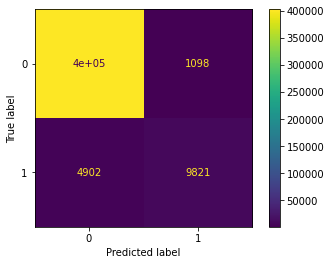

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    403528
           1       0.90      0.67      0.77     14723

    accuracy                           0.99    418251
   macro avg       0.94      0.83      0.88    418251
weighted avg       0.98      0.99      0.98    418251



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y, gs.predict(X))
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.show()
print (classification_report(y, gs.predict(X)))

In [ ]:
# quizas nos interese jugar con el umbral para tener la mayor sensibilidad/recall 
# posible (capacidad para detectar positivos). Habría que desplazar el umbral hacia la
# izquierda para ser más permisivos. Perderíamos especifidad. 

#### Modelo 2

* Como datos se toman los intervalos RR y las variables asociadas a la morfología del QRS. 
* El dataset esta desbalanceado.
* MMS para escalado de los datos
* KNN para clasificación. Probamos con entre 3 y 140 vecinos y con las distancias euclidea y manhattan. 
* Se emplea la "weighted area under the curve ROC". Se busca que ayude a compensar el desbalanceo de clases.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
chosen_k = 25
pipe = Pipeline([('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier(n_neighbors=chosen_k))])

In [ ]:
# OTRA PRUEBA CON AUC ROC METRIC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
grid_params = {
    'knn__n_neighbors' : [3,10,20,50,80,100,120, 140], 
    'knn__metric': ['euclidean', 'manhattan']
}
#gs = GridSearchCV(KNeighborsClassifier(), grid_params, cv = 5, verbose=1, scoring= 'precision',return_train_score=False)
gs = GridSearchCV(pipe, grid_params, cv = 5, verbose=1, scoring= 'roc_auc_ovr_weighted',return_train_score=False)

In [ ]:
gs.fit(X, y)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=25))]),
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': [3, 10, 20, 50, 80, 100, 120]},
             scoring='roc_auc_ovr_weighted', verbose=1)

In [ ]:
gs.best_score_ # Mejor métrica

0.9481981052364723

In [ ]:
gs.best_params_ # Mejores parámetros

{'knn__metric': 'euclidean', 'knn__n_neighbors': 120}

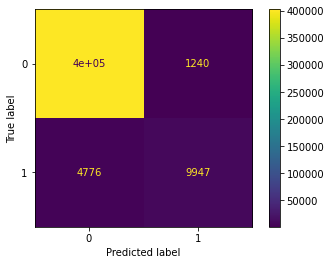

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    403528
           1       0.89      0.68      0.77     14723

    accuracy                           0.99    418251
   macro avg       0.94      0.84      0.88    418251
weighted avg       0.98      0.99      0.98    418251



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y, gs.predict(X))
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.show()
print (classification_report(y, gs.predict(X)))

#### Modelo 3

* Como datos se toman los intervalos RR y las variables asociadas a la morfología del QRS. 
* El dataset esta desbalanceado.
* MMS para escalado de los datos
* Árbol de decisión para clasificación. Probamos con entre 5 y 8 capas de profundidad. 
* Se emplea la "weighted area under the curve ROC". Se busca que ayude a compensar el desbalanceo de clases.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

chosen_depth = 3
pipe = Pipeline([('scaler', MinMaxScaler()), ('tree', DecisionTreeClassifier(max_depth=chosen_depth))])

grid_params = {
    'tree__max_depth' : [5,6,7,8]
}
#gs = GridSearchCV(KNeighborsClassifier(), grid_params, cv = 5, verbose=1, scoring= 'precision',return_train_score=False)
gs = GridSearchCV(pipe, grid_params, cv = 5, verbose=1, scoring= 'roc_auc_ovr_weighted',return_train_score=False)

In [ ]:
gs.fit(X,y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('tree',
                                        DecisionTreeClassifier(max_depth=3))]),
             param_grid={'tree__max_depth': [5, 6, 7, 8]},
             scoring='roc_auc_ovr_weighted', verbose=1)

In [ ]:
gs.best_params_

{'tree__max_depth': 5}

In [ ]:
gs.best_score_

0.9069626132219943

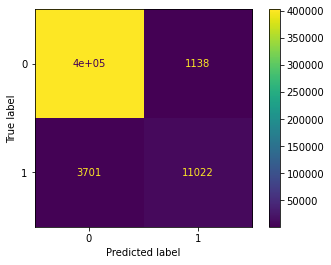

              precision    recall  f1-score   support

           N       0.99      1.00      0.99    403528
         VEB       0.91      0.75      0.82     14723

    accuracy                           0.99    418251
   macro avg       0.95      0.87      0.91    418251
weighted avg       0.99      0.99      0.99    418251



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y, gs.predict(X))
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.show()
print (classification_report(y, gs.predict(X)))

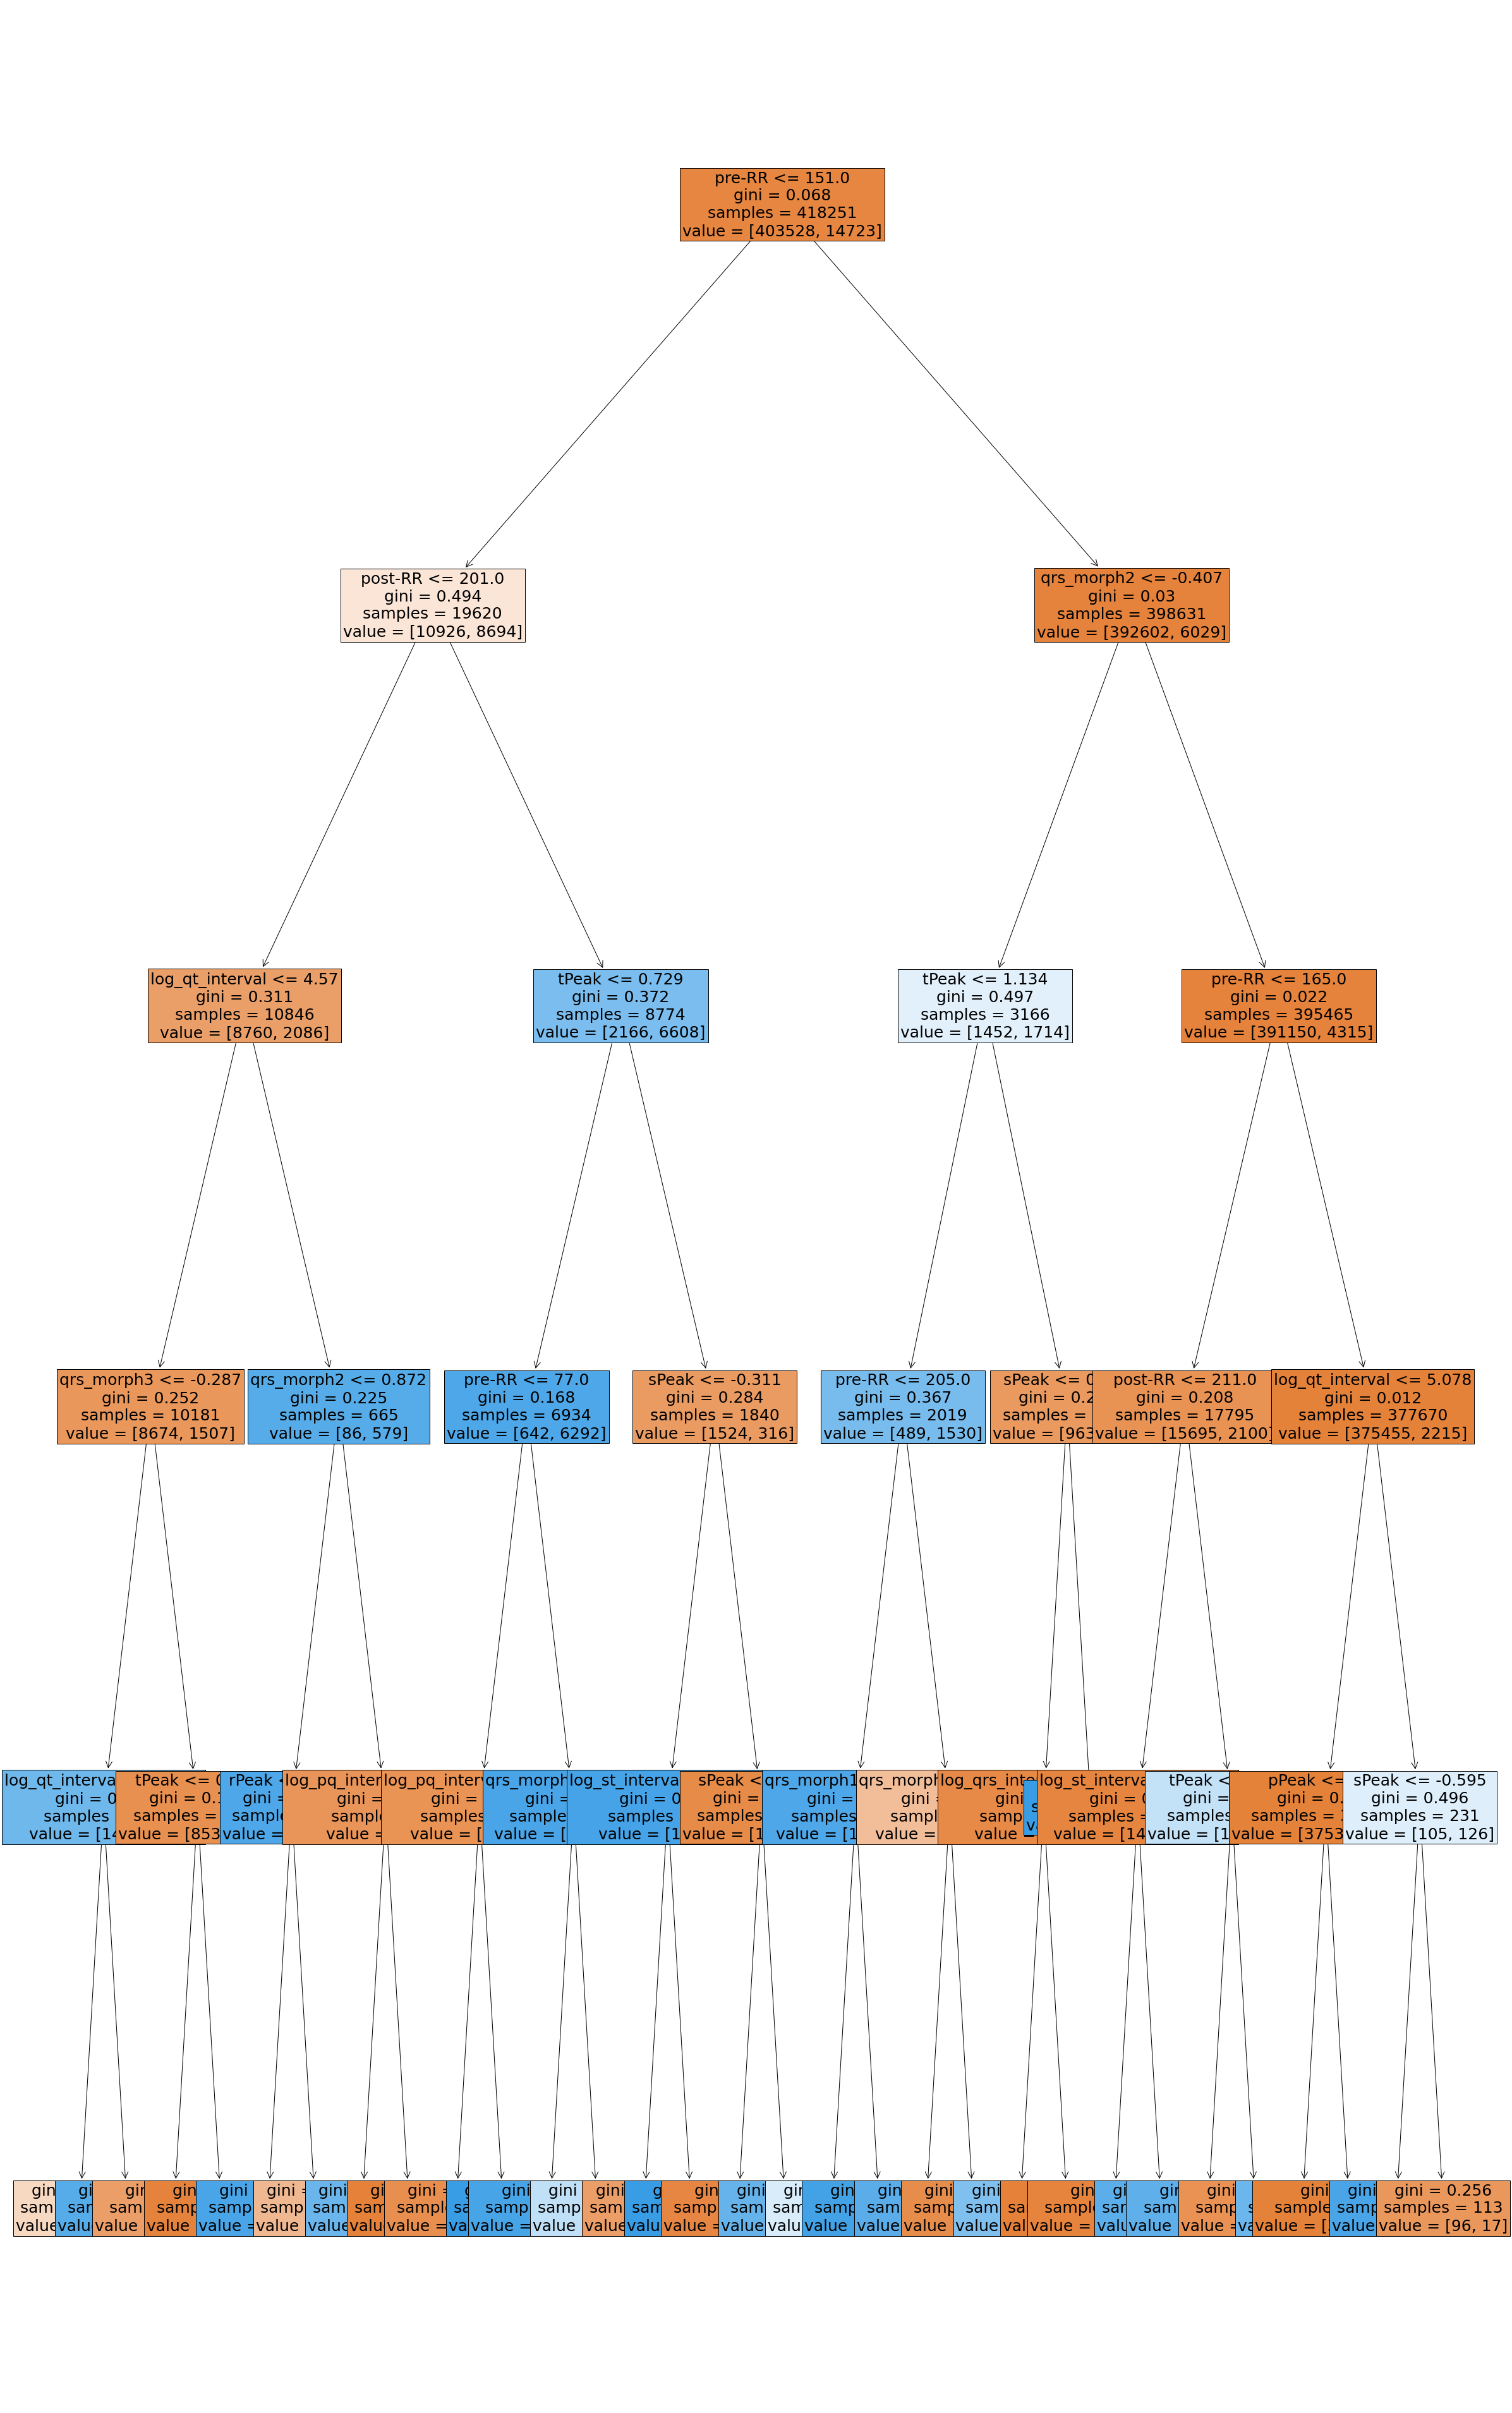

In [ ]:
treeC = DecisionTreeClassifier(max_depth=5)
treeC.fit(X, y)
fig,ax = plt.subplots(figsize=(40,70))
tree.plot_tree(treeC, ax=ax,feature_names=X.columns,  filled=True, fontsize=25)
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance
gini_importances = pd.Series(treeC.feature_importances_, index=X.columns, name='gini').to_frame()
permutation_importances = pd.Series(permutation_importance(treeC, X, y, n_repeats=10, random_state=0)['importances_mean'],
                                    index=X.columns, name='permutation').to_frame()
tree_importances = pd.merge(gini_importances,permutation_importances,left_index=True, right_index=True)
tree_importances.sort_values('gini', ascending=False)

,gini,permutation
pre-RR,0.396294,0.044240
post-RR,0.230268,0.024508
tPeak,0.147623,0.009155
qrs_morph2,0.093966,0.007725
log_qt_interval,0.042476,0.004969
sPeak,0.031081,0.001196
qrs_morph3,0.029606,0.001188
qrs_morph1,0.009153,0.000279
log_st_interval,0.008393,0.005751
pPeak,0.005070,0.001015


#### Modelo 4

* Como datos se toman los intervalos RR y las variables asociadas a la morfología del QRS. 
* El dataset esta desbalanceado.
* MMS para escalado de los datos
* SVM para clasificación. Probamos con distintos kernels ('linear', 'poly', 'rbf', 'precomputed') y con distintos valores de regularización (1,10,50). 
* Se emplea la "weighted area under the curve ROC". Se busca que ayude a compensar el desbalanceo de clases.

In [ ]:
from sklearn.svm import SVC

grid_params = {
    'svc__C' : [1,10,50],
    'svc__kernel': ['linear', 'poly', 'rbf', 'precomputed']
}

pipe = Pipeline([('scaler', MinMaxScaler()), ('svc', SVC())])

gs = GridSearchCV(pipe, grid_params, cv = 3, verbose=1, scoring= 'roc_auc_ovr_weighted',return_train_score=False)

In [ ]:
gs.fit(X, y)

In [ ]:
be = gs.best_estimator_
be

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn import metrics
print('FINAL MODEL')
cm = confusion_matrix(y, gs.predict(X))
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.show()
print (metrics.classification_report(y, gs.predict(X)))

print('CV RESULTS')
be = gs.best_estimator_
cv_results = cross_val_predict(pipe, X, y, cv=3)

cm = confusion_matrix(y, cv_results)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.show()
print (metrics.classification_report(y, cv_results))

#### Modelo 5

* Como datos se toman los intervalos RR y las variables asociadas a la morfología del QRS. 
* El dataset esta desbalanceado.
* MMS para escalado de los datos
* Random forest para clasificación. Probamos entre 20 y 40 estimadores. 
* Se emplea la "weighted area under the curve ROC". Se busca que ayude a compensar el desbalanceo de clases.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import GridSearchCV
grid_params = {
    'rf__n_estimators' : [20,24,28,32,40],
}

pipe = Pipeline([('scaler', MinMaxScaler()), ('rf', RandomForestClassifier())])

gs = GridSearchCV(pipe, grid_params, cv = 3, verbose=1, scoring= 'roc_auc_ovr_weighted',return_train_score=False)

In [ ]:
gs.fit(X,y)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__n_estimators': [24, 28, 32, 40]},
             scoring='roc_auc_ovr_weighted', verbose=1)

In [ ]:
gs.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('rf', RandomForestClassifier(n_estimators=24))])

In [ ]:
gs.best_score_

0.9366873741008576

In [ ]:
# qué nos falta?
#  - empleo de variables no correlacionadas
#  - clases muy desbalanceadas --> hemos empleado la roc_auc_curve_weighted como métrica,
                                   # pero haría falta aplicar técnicas de data augmentation?
#  - pensar en cómo aumentar la sensibilidad --> quizás emplear alguna métrica específica
#  - por que los resultados en el classification report no coinciden con el 
#     best score del gs
#  - remove outliers: quitar el x percentil superior e inferior (donde sea necesario).
#                     Mirar si estos outliers nos aportan alguna información. 


#### Probamos con otro set de variables
Para la selección de las variables ahora no se tiene encuenta únicamente la perspectiva médica sino también la la correlación de estas entre sí y con el target. 

In [ ]:
# usar rr pre y post y las morph
columns = ['pre-RR','post-RR', 'qrs_morph0', 'qrs_morph2', 'qrs_morph4', 'pPeak', 'sPeak', 'st_interval']
X = df[columns]
y = df['target']
y.value_counts()

0    403528
1     14723
Name: target, dtype: int64

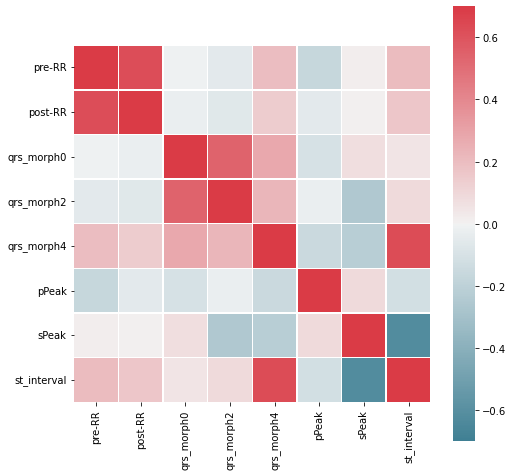

In [ ]:
corr = X.corr(method='pearson') # Pearson (linear), Spearman (non linear)

f, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)


sns.heatmap(corr, cmap=cmap, vmin=-0.7, vmax=0.7,
            square=True, linewidths=.5)


In [ ]:
sns.pairplot(df[['pre-RR','post-RR', 'qrs_morph0', 'qrs_morph2', 'qrs_morph4', 'pPeak', 
              'sPeak', 'st_interval', 'target']], hue='target') 

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

pipe = Pipeline([('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])

grid_params = {
    'knn__n_neighbors' : [100,120], 
    'knn__metric': ['euclidean']
}
gs = GridSearchCV(pipe, grid_params, cv = 5, verbose=1, scoring= 'roc_auc_ovr_weighted',return_train_score=False)

In [ ]:
gs.fit(X,y)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['euclidean'],
                         'knn__n_neighbors': [100, 120]},
             scoring='roc_auc_ovr_weighted', verbose=1)

In [ ]:
gs.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('knn',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=120))])

In [ ]:
probas = gs.predict_proba(X)

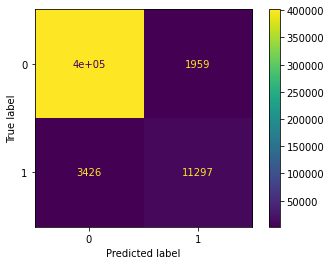

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    403528
           1       0.85      0.77      0.81     14723

    accuracy                           0.99    418251
   macro avg       0.92      0.88      0.90    418251
weighted avg       0.99      0.99      0.99    418251



In [ ]:
# jugamos con el th para disminuir los falsos negativos. Aumenta el número de 
# falsos positivos. 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
th = 0.3
pred_labels = (probas > th)*1
pred_labels = pd.DataFrame(pred_labels)

cm = confusion_matrix(y, pred_labels[1])
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.show()
print (classification_report(y, pred_labels[1]))

### Modelos finales
Se incluyen los datos del dataset balanceado y se consideran los resultados del Boruta y el RFE.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

#### Modelo final 1: knn

In [ ]:
pipe = Pipeline([('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])
grid_params = {
    'knn__n_neighbors' : [100,120,150,170], 
    'knn__metric': ['euclidean', 'manhattan']
}
gs = GridSearchCV(pipe, grid_params, cv = 5, verbose=1, scoring='roc_auc_ovr_weighted', return_train_score=False)
gs.fit(X_combined_sampling, y_combined_sampling)

print(gs.best_estimator_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('knn',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=100))])


TRAIN RESULTS
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    201760
           1       0.97      0.89      0.93     40352

    accuracy                           0.98    242112
   macro avg       0.98      0.94      0.96    242112
weighted avg       0.98      0.98      0.98    242112



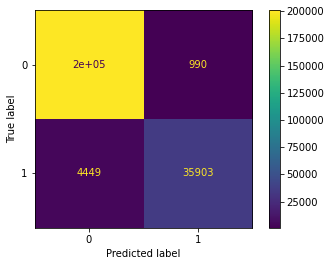

In [ ]:
print('TRAIN RESULTS') 
y_pred_train = gs.predict(X_combined_sampling)
cm = confusion_matrix(y_combined_sampling, y_pred_train) # Create confusion matrix
cm_display = ConfusionMatrixDisplay(cm).plot() # Display cm
print(classification_report(y_combined_sampling, y_pred_train)) # Metrics report

#### Modelo final 2: árbol de decisión

In [ ]:
pipe = Pipeline([('scaler', MinMaxScaler()), 
                 ('tree', DecisionTreeClassifier())])
grid_params = {'tree__max_depth' : [12,15]}
gs = GridSearchCV(pipe, grid_params, cv = 5, verbose=1, scoring='roc_auc_ovr_weighted', return_train_score=False)
gs.fit(X_combined_sampling, y_combined_sampling)

print(gs.best_estimator_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('tree', DecisionTreeClassifier(max_depth=15))])


TRAIN RESULTS
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    201760
           1       0.99      0.97      0.98     40352

    accuracy                           0.99    242112
   macro avg       0.99      0.98      0.99    242112
weighted avg       0.99      0.99      0.99    242112



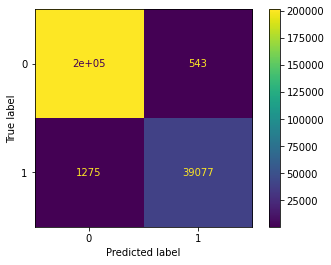

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
print('TRAIN RESULTS') 
y_pred_train = gs.predict(X_combined_sampling)
cm = confusion_matrix(y_combined_sampling, y_pred_train) # Create confusion matrix
cm_display = ConfusionMatrixDisplay(cm).plot() # Display cm
print(classification_report(y_combined_sampling, y_pred_train)) # Metrics report

Probando con entre 5 y 8 como valores de profundidad máxima obtenemos que el mejor estimador se consigue con 8. Si aumentamos hasta 10, vemos que el mejor estimador se consigue con 10. Si seguimos aumentando la profundidad sigue mejorando el modelo.

Permitir una profundidad tan grande supone perder explicabilidad recibiendo a cambio una mejora de una o dos centésimas en las métricas. Además, probablemente permitir tantas divisiones en las ramas del árbol suponga crear un modelo más sobreentrenado. 

#### Modelo final 3: random forest

In [ ]:
grid_params = {'rf__n_estimators' : [20, 24, 28],
               'rf__max_depth' : [3,4,5,6]}
pipe = Pipeline([('scaler', MinMaxScaler()), 
                 ('rf', RandomForestClassifier())])
gs = GridSearchCV(pipe, grid_params, cv = 5, verbose=1, scoring= 'roc_auc_ovr_weighted',return_train_score=False)
gs.fit(X_combined_sampling, y_combined_sampling)

print(gs.best_estimator_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('rf', RandomForestClassifier(max_depth=6, n_estimators=28))])


TRAIN RESULTS
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    201760
           1       0.97      0.85      0.91     40352

    accuracy                           0.97    242112
   macro avg       0.97      0.92      0.94    242112
weighted avg       0.97      0.97      0.97    242112



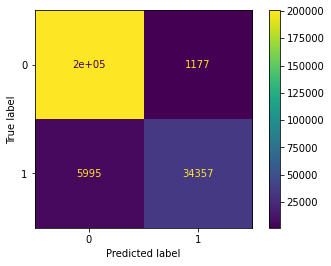

In [ ]:
print('TRAIN RESULTS') 
y_pred_train = gs.predict(X_combined_sampling)
cm = confusion_matrix(y_combined_sampling, y_pred_train) # Create confusion matrix
cm_display = ConfusionMatrixDisplay(cm).plot() # Display cm
print(classification_report(y_combined_sampling, y_pred_train)) # Metrics report

Probando con entre 20 y 40 estimadores sale que el mejor modelo es el de 40. La matriz de confusión nos indica que solo falla 5 muestras... Sobreentrena. Con 24 salen solo 6 fallos. Aunque sigamos bajando a 5 siguen saliendo menos de 100 errores. Realmente tiene sentido, porque si empleando solo un árbol de decisión nos salen scores casi de 1, en cuanto combines los resultados de más de un árbol vas a corregir esos errores. Hay que mirar si el modelo esta sobreentrenando. 


#### MODELO DEFINITIVO

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

pipe = Pipeline([('scaler', MinMaxScaler()), 
                 ('tree', DecisionTreeClassifier(min_samples_leaf=20))])
grid_params = {'tree__max_depth' : [4,5,6,7,8]}
gs = GridSearchCV(pipe, grid_params, cv = 5, verbose=1, scoring='roc_auc_ovr_weighted', return_train_score=False)
gs.fit(X_combined_sampling, y_combined_sampling)

print(gs.best_estimator_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('tree',
                 DecisionTreeClassifier(max_depth=8, min_samples_leaf=20))])


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

print('TRAIN RESULTS') 
y_pred_train = gs.predict(X_combined_sampling)
cm = confusion_matrix(y_combined_sampling, y_pred_train) # Create confusion matrix
cm_display = ConfusionMatrixDisplay(cm).plot() # Display cm
print(classification_report(y_combined_sampling, y_pred_train)) # Metrics report

TRAIN RESULTS
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    198490
           1       0.95      0.93      0.94     39698

    accuracy                           0.98    238188
   macro avg       0.97      0.96      0.96    238188
weighted avg       0.98      0.98      0.98    238188



In [ ]:
probas = gs.predict_proba(X_combined_sampling)

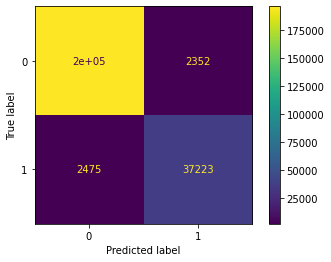

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    198490
           1       0.94      0.94      0.94     39698

    accuracy                           0.98    238188
   macro avg       0.96      0.96      0.96    238188
weighted avg       0.98      0.98      0.98    238188



In [ ]:
th = 0.3
pred_labels = (probas > th)*1
pred_labels = pd.DataFrame(pred_labels)

cm = confusion_matrix(y_combined_sampling, pred_labels[1])
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.show()
print (classification_report(y_combined_sampling, pred_labels[1]))

In [ ]:
tree_text = tree.plot_tree(gs.best_estimator_[1], 
               #max_depth=3, 
               ax=ax,
               feature_names=X_combined_sampling.columns, 
               filled=True, 
               rounded=True,
               fontsize=16,
               class_names=['Normal','Ánomalo'])
tree_text

[Text(0.5140625, 0.9444444444444444, 'pre-RR <= 0.463\ngini = 0.278\nsamples = 238188\nvalue = [198490, 39698]\nclass = Normal'),
 Text(0.31008522727272725, 0.8333333333333334, 'post-RR <= 0.536\ngini = 0.403\nsamples = 41348\nvalue = [11559, 29789]\nclass = Ánomalo'),
 Text(0.171875, 0.7222222222222222, 'post-RR <= 0.362\ngini = 0.481\nsamples = 15691\nvalue = [9389, 6302]\nclass = Normal'),
 Text(0.08920454545454545, 0.6111111111111112, 'sPeak <= 0.554\ngini = 0.37\nsamples = 5233\nvalue = [1282, 3951]\nclass = Ánomalo'),
 Text(0.04090909090909091, 0.5, 'qrs_morph2 <= 0.666\ngini = 0.214\nsamples = 3554\nvalue = [433, 3121]\nclass = Ánomalo'),
 Text(0.022727272727272728, 0.3888888888888889, 'qrs_morph3 <= 0.777\ngini = 0.14\nsamples = 3284\nvalue = [248, 3036]\nclass = Ánomalo'),
 Text(0.01818181818181818, 0.2777777777777778, 'sPeak <= 0.522\ngini = 0.127\nsamples = 3251\nvalue = [222, 3029]\nclass = Ánomalo'),
 Text(0.00909090909090909, 0.16666666666666666, 'rPeak <= 0.787\ngini = 0

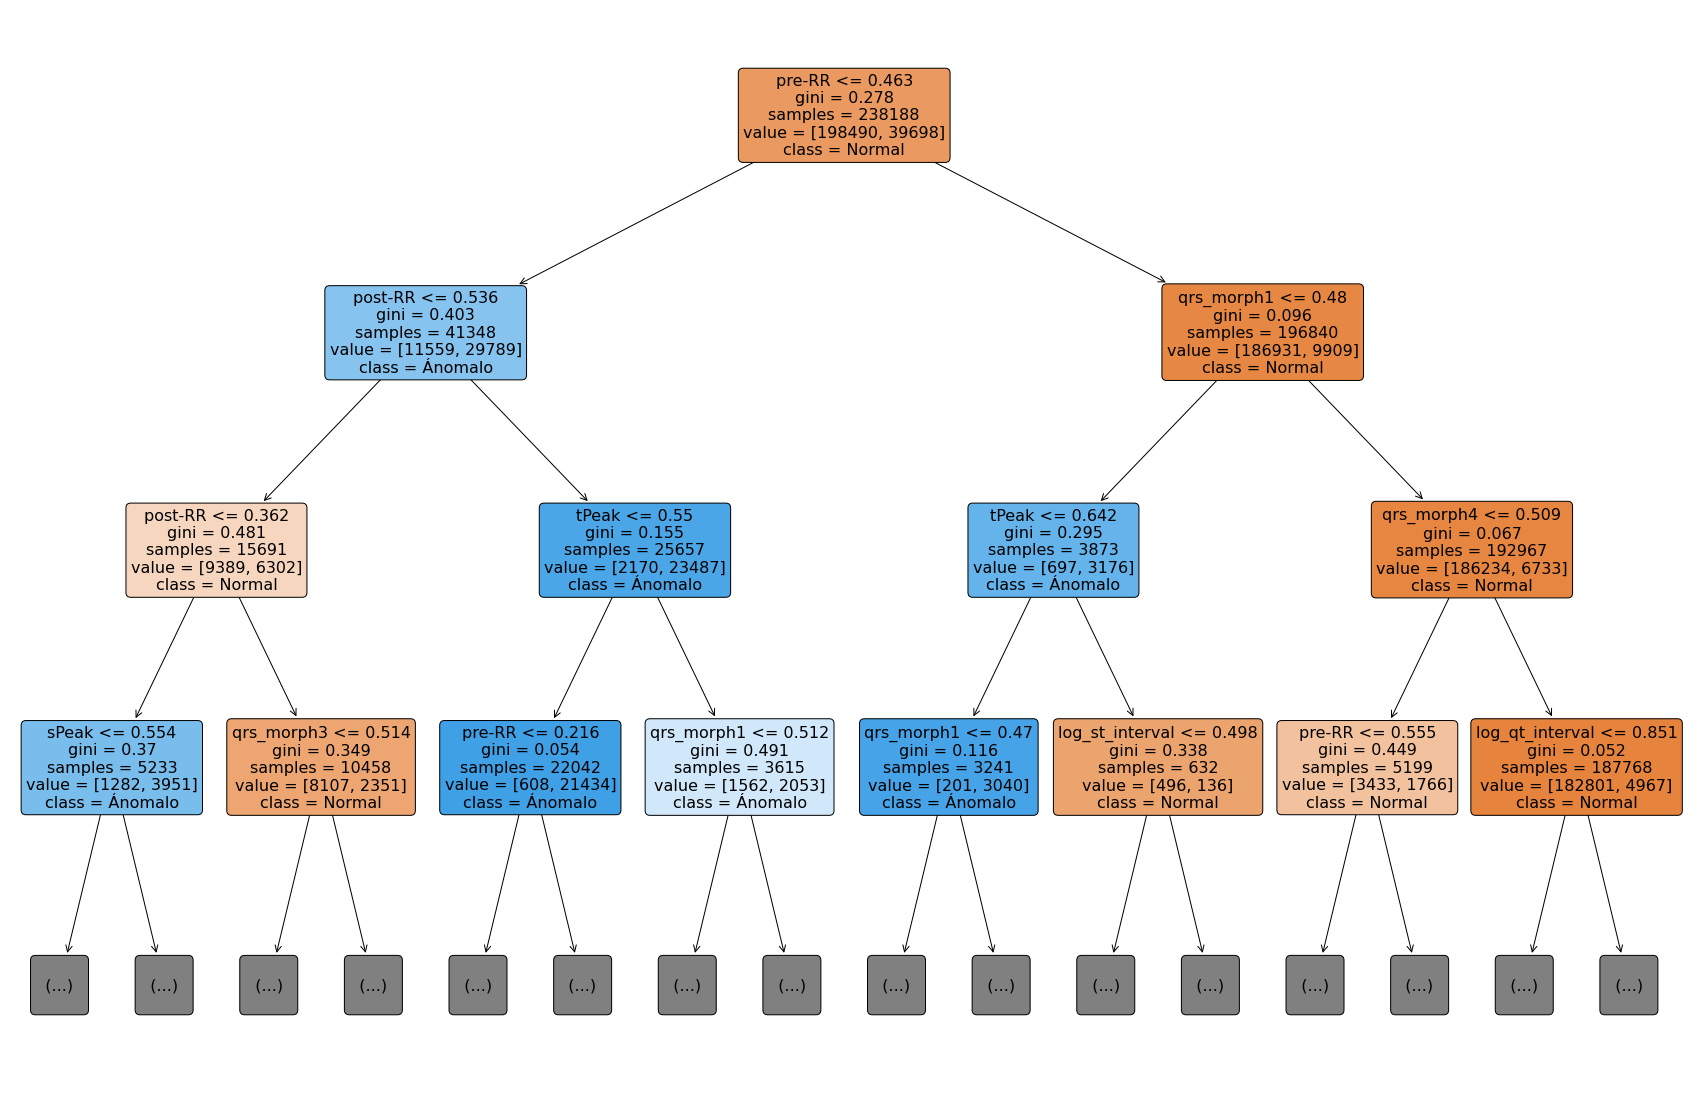

In [ ]:
%matplotlib inline

fig,ax = plt.subplots(figsize=(30,20))
plt.set_cmap('jet')
tree.plot_tree(gs.best_estimator_[1], 
               max_depth=3, 
               ax=ax,
               feature_names=X_combined_sampling.columns, 
               filled=True, 
               rounded=True,
               fontsize=16,
               class_names=['Normal','Ánomalo'])
plt.savefig('/content/drive/MyDrive/proyecto/Memoria/arbol_decision.png')


In [ ]:
from sklearn.inspection import permutation_importance

tree = gs.best_estimator_[1]
gini_importances = pd.Series(tree.feature_importances_, 
                             index=X_combined_sampling.columns, 
                             name='gini').to_frame()
permutation_importances = pd.Series(
                                    permutation_importance(tree, X_combined_sampling, 
                                                           y_combined_sampling, 
                                                           n_repeats=10, 
                                                           random_state=0)['importances_mean'],
                                    index=X_combined_sampling.columns, 
                                    name='permutation'
                                    ).to_frame()
tree_importances = pd.merge(gini_importances,permutation_importances,left_index=True, right_index=True)
tree_importances.sort_values('gini', ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: User

,gini,permutation
pre-RR,0.554699,0.000000
post-RR,0.152916,0.000000
qrs_morph1,0.098715,0.000249
tPeak,0.068640,0.000139
sPeak,0.024042,0.000000
log_st_interval,0.019517,0.000000
qrs_morph3,0.018006,0.000000
qrs_morph4,0.016698,0.000119
rPeak,0.016154,0.001685
log_qt_interval,0.015045,0.000000


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
train_results = {}
test_results = {}
for n in range(4,9):
    treeC = DecisionTreeClassifier(max_depth=n)
    treeC.fit(X_combined_sampling, y_combined_sampling)
    train_results[n] = {
        'accuracy':accuracy_score(y_combined_sampling, treeC.predict(X_combined_sampling)),
        'precision':precision_score(y_combined_sampling, treeC.predict(X_combined_sampling)),
        'recall':recall_score(y_combined_sampling, treeC.predict(X_combined_sampling)),
        'f1score': f1_score(y_combined_sampling, treeC.predict(X_combined_sampling))
    }

train_res_md = pd.DataFrame(train_results).T

Text(0.5, 0, 'Max depth')

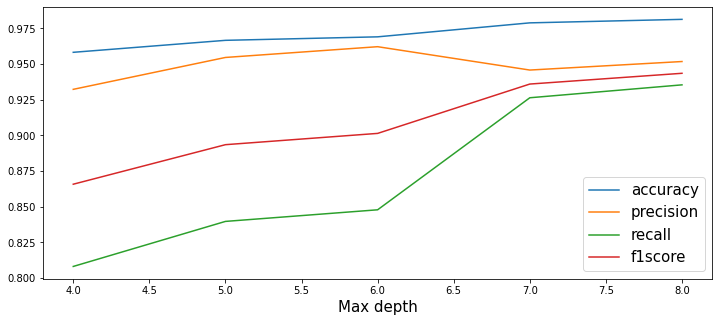

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(1,1,figsize=(12,5))
train_res_md['accuracy'].plot(ax=ax,label='accuracy')
train_res_md['precision'].plot(ax=ax,label='precision')
train_res_md['recall'].plot(ax=ax,label='recall')
train_res_md['f1score'].plot(ax=ax,label='f1score')
ax.legend(fontsize=15)
ax.set_xlabel('Max depth', fontsize=15)

REENTRENAMOS UN ÁRBOL LIMITANDO SU CRECIMIENTO A 8 NIVELES DE PROFUNDIDAD CON AQUELLAS VARIABLES CON UN GINI > 0.015

In [ ]:
cols = list(tree_importances[tree_importances['gini']>0.015].index)
selected_X = X_combined_sampling[cols]
pipe = Pipeline([('scaler', MinMaxScaler()), 
                 ('tree', DecisionTreeClassifier(min_samples_leaf=20))])
grid_params = {'tree__max_depth' : [8]}
gs = GridSearchCV(pipe, grid_params, cv = 5, verbose=1, scoring='roc_auc_ovr_weighted', return_train_score=False)
gs.fit(selected_X, y_combined_sampling)

print(gs.best_estimator_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('tree',
                 DecisionTreeClassifier(max_depth=8, min_samples_leaf=20))])


TRAIN RESULTS
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    198490
           1       0.95      0.93      0.94     39698

    accuracy                           0.98    238188
   macro avg       0.97      0.96      0.96    238188
weighted avg       0.98      0.98      0.98    238188



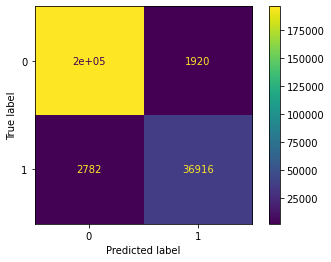

In [ ]:
print('TRAIN RESULTS') 
y_pred_train = gs.predict(selected_X)
cm = confusion_matrix(y_combined_sampling, y_pred_train) # Create confusion matrix
cm_display = ConfusionMatrixDisplay(cm).plot() # Display cm
print(classification_report(y_combined_sampling, y_pred_train)) # Metrics report

In [ ]:
probas = gs.predict_proba(selected_X)

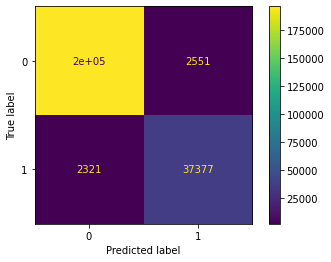

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    198490
           1       0.94      0.94      0.94     39698

    accuracy                           0.98    238188
   macro avg       0.96      0.96      0.96    238188
weighted avg       0.98      0.98      0.98    238188



In [ ]:
th = 0.3
pred_labels = (probas > th)*1
pred_labels = pd.DataFrame(pred_labels)

cm = confusion_matrix(y_combined_sampling, pred_labels[1])
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.show()
print (classification_report(y_combined_sampling, pred_labels[1]))

In [ ]:
tree_model = gs.best_estimator_[1]
gini_importances = pd.Series(tree_model.feature_importances_, 
                             index=selected_X.columns, 
                             name='gini').to_frame()
permutation_importances = pd.Series(
                                    permutation_importance(tree_model, selected_X, 
                                                           y_combined_sampling, 
                                                           n_repeats=10, 
                                                           random_state=0)['importances_mean'],
                                    index=selected_X.columns, 
                                    name='permutation'
                                    ).to_frame()
tree_importances = pd.merge(gini_importances,permutation_importances,left_index=True, right_index=True)
tree_importances.sort_values('gini', ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: User

,gini,permutation
pre-RR,0.558909,0.000000
post-RR,0.153577,0.000000
qrs_morph1,0.101516,-0.000218
tPeak,0.072645,0.000124
sPeak,0.024414,0.000000
log_st_interval,0.020738,0.000000
rPeak,0.018581,0.001685
qrs_morph3,0.017515,-0.000035
qrs_morph4,0.017052,0.000133
log_qt_interval,0.015054,0.000000


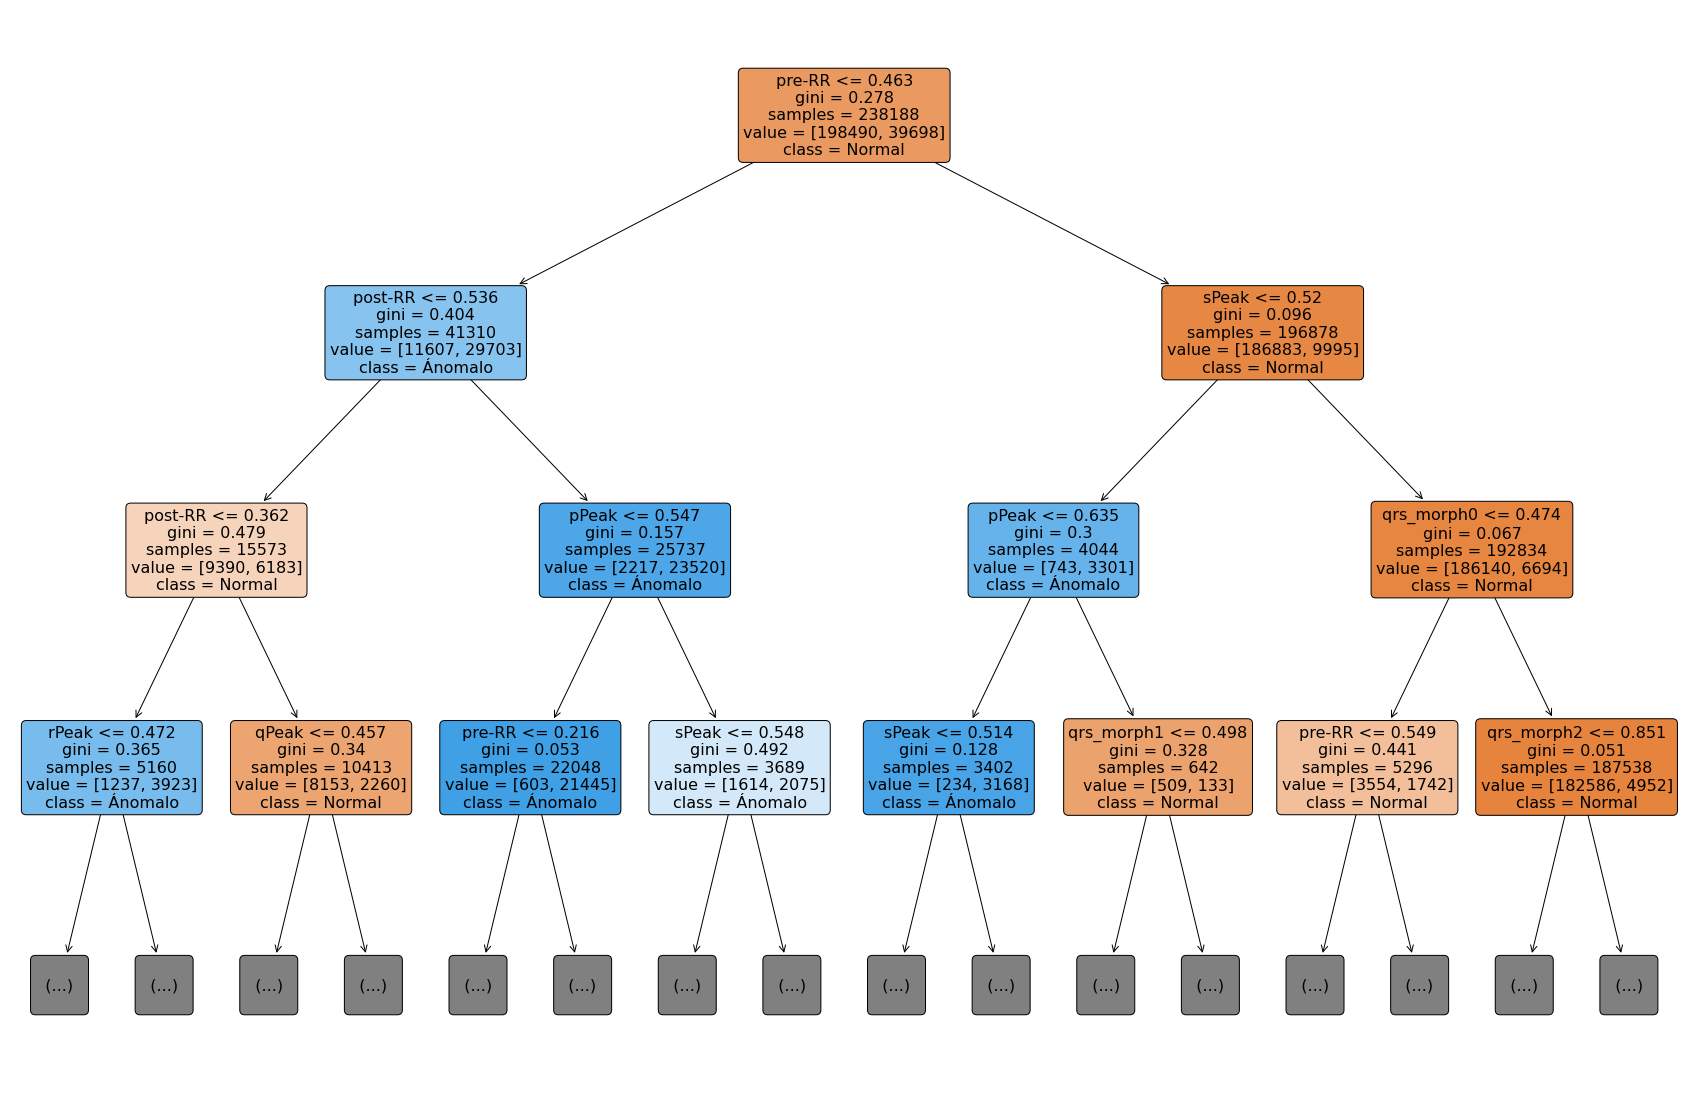

In [ ]:
from sklearn import tree
fig,ax = plt.subplots(figsize=(30,20))
plt.set_cmap('jet')
tree.plot_tree(gs.best_estimator_[1], 
               max_depth=3, 
               ax=ax,
               feature_names=X_combined_sampling.columns, 
               filled=True, 
               rounded=True,
               fontsize=16,
               class_names=['Normal','Ánomalo'])
plt.savefig('/content/drive/MyDrive/proyecto/Memoria/arbol_decision.png')

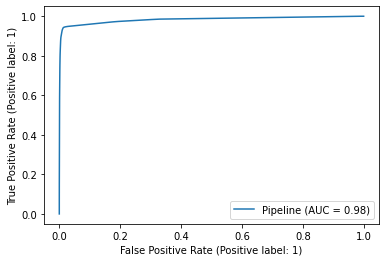

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(gs.best_estimator_, selected_X, y_combined_sampling)